Gradient acc: 0.91
sklearn acc: 0.91


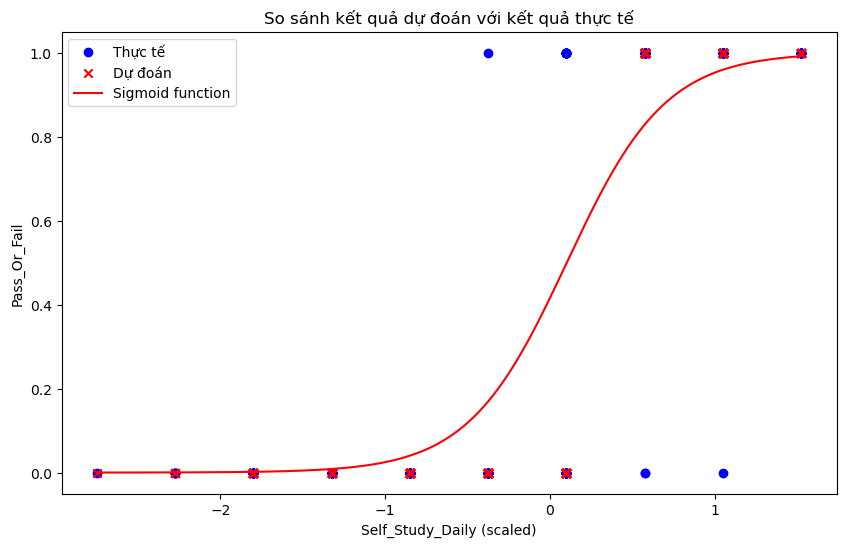

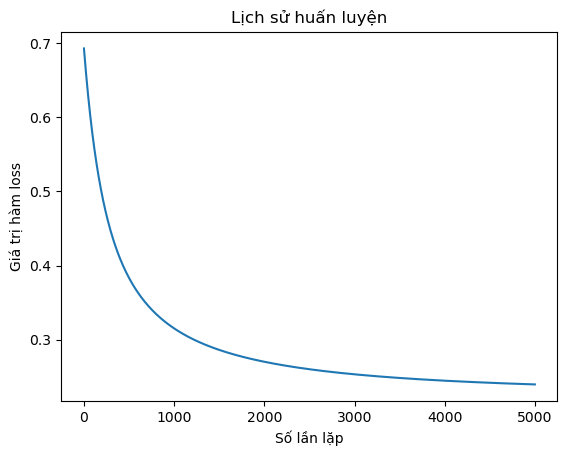

[[3.33105898]]


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
df=pd.read_csv("D:/NAM 2 KI 1/Project ML/ML 02/Datasets/Student-Pass-Fail-Data - Copy.csv")

# Hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hàm chi phí(Cost Function)
def cost_function(y, p):
    n = len(y)
    epsilon = 1e-15 
    sum_error = 0
    for i in range(n):
        sum_error += (y[i] * np.log(p[i] + epsilon) + (1 - y[i]) * np.log(1 - p[i] + epsilon))
    cost = -sum_error / n
    return cost

# Gradient Descent
def gradient_descent(X, y, learning_rate, n_iterations):
    n_samples, n_features = X.shape
    weights = np.zeros((n_features, 1))
    bias=0.0
    y = y.reshape((-1, 1))
    cost_his=[]
    for _ in range(n_iterations):
        z = np.dot(X, weights)+bias
        p = sigmoid(z)
        w = np.dot(X.T, (p-y)) / n_samples
        b=  np.sum(p-y)/n_samples
        weights= weights-learning_rate * w
        bias= bias-learning_rate * b
        cost=cost_function(y,p)
        cost_his.append(cost)
    # print(cost_his[-1])

    return weights,bias,cost_his

# Hàm dự đoán
def predict(X, weights,bias):
    p = sigmoid(np.dot(X, weights)+bias)
    return np.array([1.0 if tmp >= 0.5 else 0.0 for tmp in p])
    # return (p > 0.5).astype(int)

X = df['Hours_Study'].values.reshape(-1, 1)  # Chuyển đổi X thành mảng numpy và reshape
y = df['Pass_Or_Fail'].values  # Chuyển đổi y thành mảng numpy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

stand_scaler = StandardScaler()
X_train_scaled = stand_scaler.fit_transform(X_train)
X_test_scaled = stand_scaler.transform(X_test)

# Huấn luyện mô hình
w, b, cost = gradient_descent(X_train_scaled, y_train, learning_rate=0.01, n_iterations=5000)

# Dự đoán và đánh giá mô hình
y_pred = predict(X_test_scaled, w, b)
print("Gradient acc:", accuracy_score(y_test, y_pred))

logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred_test = logistic_model.predict(X_test_scaled)
print('sklearn acc:', accuracy_score(y_test, y_pred_test))
# Vẽ dữ liệu
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled, y_test, color='blue', label='Thực tế')
plt.scatter(X_test_scaled, y_pred, color='red', marker='x', label='Dự đoán')
x_values = np.linspace(min(X_test_scaled), max(X_test_scaled), 1000)
y_values = sigmoid(np.dot(x_values, w) + b)
plt.plot(x_values, y_values, color='red', label='Sigmoid function')
plt.xlabel('Self_Study_Daily (scaled)')
plt.ylabel('Pass_Or_Fail')
plt.title('So sánh kết quả dự đoán với kết quả thực tế')
plt.legend()
plt.show()

plt.plot([i for i in range(5000)],cost)
plt.title('Lịch sử huấn luyện')
plt.xlabel("Số lần lặp")
plt.ylabel('Giá trị hàm loss')
plt.show()




<h3>Dự đoán</h3>
Từ kq mô hình sử dụng GD, dự đoán với số giờ học 

In [ ]:
study_time = np.array([[2.5],[7]])
study_time_scaled = stand_scaler.transform(study_time)
print(predict(study_time_scaled,w,b))

[0. 1.]


<h3>Đa biến</h3>

[0.43154495]
accurary score Gradient: 0.84
accurary score sklearn: 0.84


c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


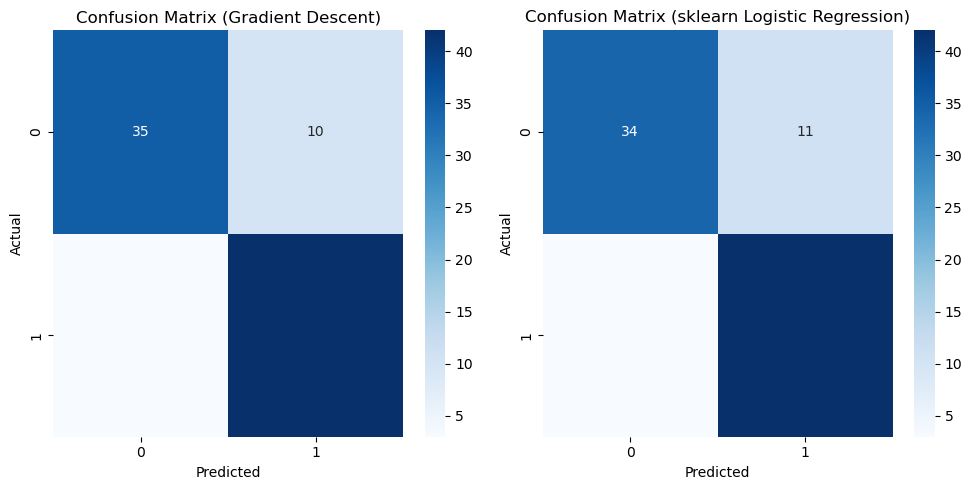

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
df=pd.read_csv("D:/NAM 2 KI 1/Project ML/ML 02/Datasets\heart_processed.csv")

# Hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hàm chi phí(Cost Function)
def cost_function(y, p):
    n = len(y)
    epsilon = 1e-15  # Định nghĩa một epsilon rất nhỏ để tránh trường hợp chia cho 0
    sum_error = 0
    for i in range(n):
        sum_error += (y[i] * np.log(p[i] + epsilon) + (1 - y[i]) * np.log(1 - p[i] + epsilon))
    
    cost = -sum_error / n  # Trung bình cộng các giá trị lỗi
    return cost

# Gradient Descent
def gradient_descent(X, y, learning_rate, n_iterations):
    n_samples, n_features = X.shape
    weights = np.zeros((n_features, 1))
    bias=0.0
    y = y.reshape((-1, 1))
    cost_his=[]
    for _ in range(n_iterations):
        z = np.dot(X, weights)+bias
        p = sigmoid(z)
        w = np.dot(X.T, (p-y)) / n_samples
        b=  np.sum(p-y)/n_samples
        weights= weights-learning_rate * w
        bias= bias-learning_rate * b
        cost=cost_function(y,p)
        cost_his.append(cost)
    print(cost_his[-1])

    return weights,bias,cost_his

# Hàm dự đoán
def predict(X, weights,bias):
    p = sigmoid(np.dot(X, weights)+bias)
    return np.array([1.0 if tmp >= 0.5 else 0.0 for tmp in p])
    # return (p > 0.5).astype(int)

ft=['cp', 'thalachh', 'exng', 'oldpeak', 'caa']
X = df[ft]
y = df['output']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=32) 
# 22
MM_scaler = StandardScaler()
X_train_scaled = MM_scaler.fit_transform(X_train)
X_test_scaled = MM_scaler.transform(X_test)
y_train = y_train.values.reshape((-1, 1))
y_test = y_test.values.reshape((-1, 1))

# Huấn luyện mô hình
w,b,cost = gradient_descent(X_train_scaled, y_train, learning_rate=0.01, n_iterations=1000)

# Dự đoán và đánh giá mô hình
y_pred = predict(X_test_scaled, w,b)
print(f"accurary score Gradient: {accuracy_score(y_test,y_pred_test):.2f}")
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred_test = logistic_model.predict(X_test_scaled)
print(f"accurary score sklearn: {accuracy_score(y_test,y_pred_test):.2f}")
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Vẽ ma trận nhầm lẫn cho mô hình tự triển khai
conf_matrix_gd = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_gd, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Gradient Descent)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Vẽ ma trận nhầm lẫn cho mô hình sklearn
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_test)
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_sklearn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (sklearn Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

